In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spinmob as sm
import mcphysics as mphys
from scipy.optimize import curve_fit
from scipy.stats.distributions import chi2
from os import listdir
from scipy.signal import find_peaks
import matplotlib as mpl
%matplotlib inline

new_rc_params = {'text.usetex': False,
    "svg.fonttype": 'none'
    }
mpl.rcParams.update(new_rc_params)

In [4]:
import calibration
# These two lines tell your Jupyter notebook to reload
# external modules/functions if they have been modified
# This way you don't have to quit your kernel and import
# everything again whenever you make a change!
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Channel Calibration (first time) with Pulser

In [5]:
#Loading Pulser calibration peaks into array along with measured voltages
pulser_peaks = calibration.Load('Electronic_Calibration')
pulser_vmin = [1.60, 2.12, 2.60, 3.16, 3.68, 4.20, 4.52, 5.20, 5.76, 6.32, 6.88, 7.40, 7.92, 8.49, 8.98, 9.52, 10.10, 10.60]
pulser_vmax = [1.64, 2.16, 2.64, 3.20, 3.72, 4.24, 4.56, 5.24, 5.80, 6.36, 6.88, 7.44, 7.96, 8.49, 9.03, 9.56, 10.10, 10.70]

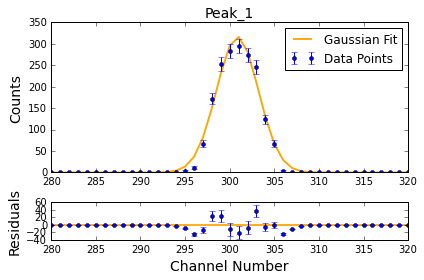

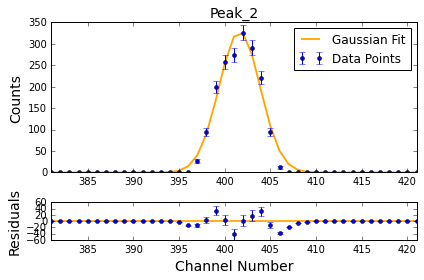

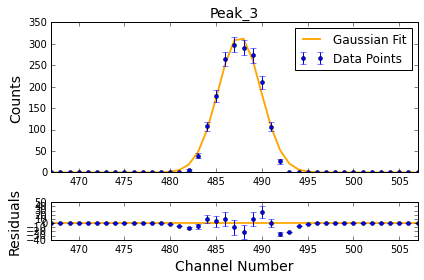

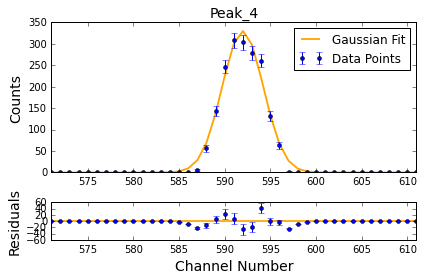

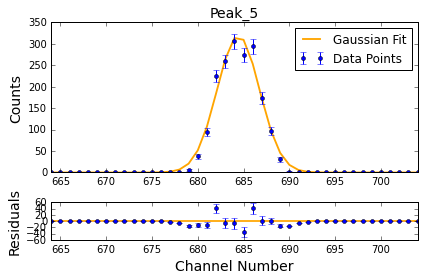

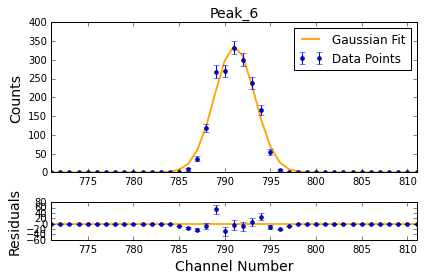

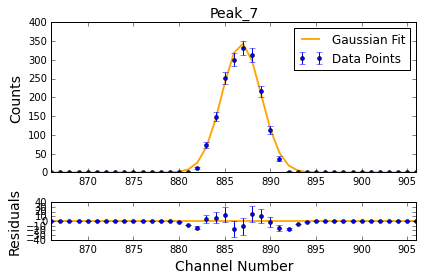

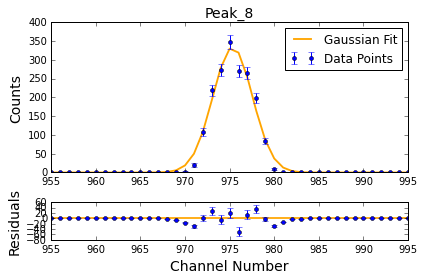

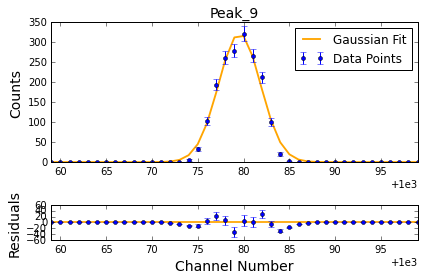

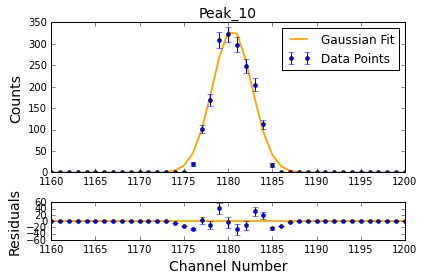

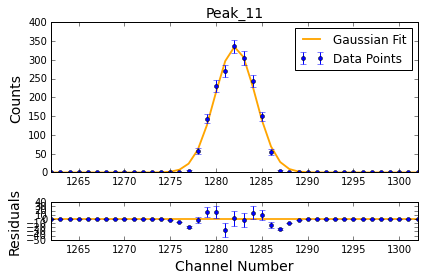

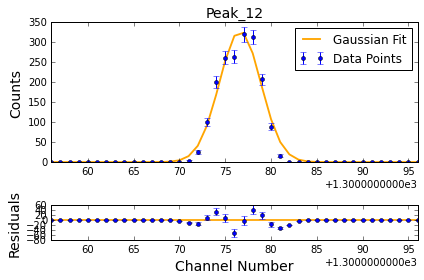

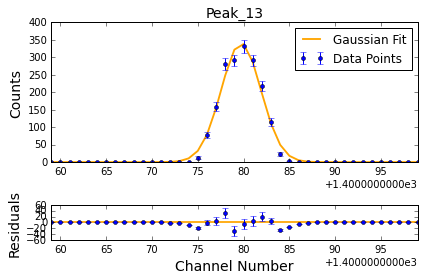

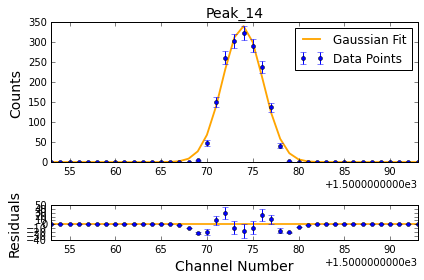

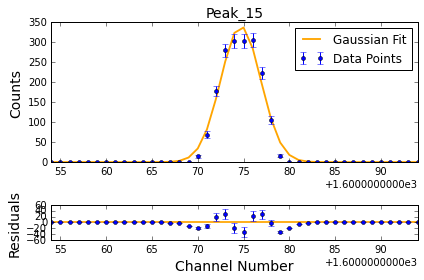

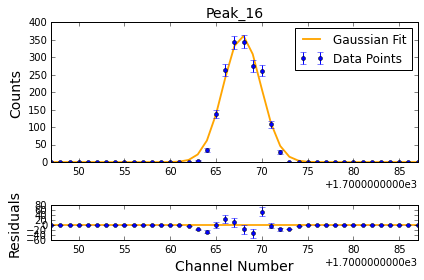

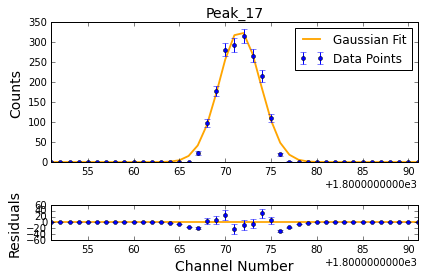

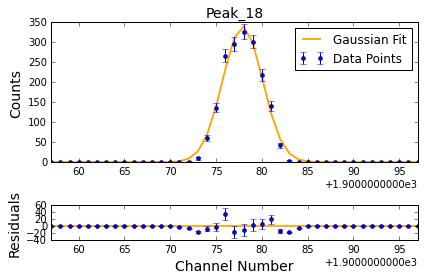

26.40580687091522 1.8307038053275146
41.879486267692094 1.9384141319831814
7.339502192635055 1.9384141319831814
51.81776943607652 1.9384141319831814
22.589554704028185 1.879886400513383
15.84608263171674 1.9384141319831814
20.84822984955599 1.9384141319831814
36.91568669482711 1.9384141319831814
25.419408535808348 1.879886400513383
11.528359833533463 2.009591492762881
30.988546827669005 1.9384141319831814
19.647940138317423 1.9384141319831814
24.334384954056304 1.9384141319831814
44.71240140293324 1.9384141319831814
16.212947671529953 2.009591492762881
18.704151228646335 2.009591492762881
47.27187130982035 1.9384141319831814
24.4089635145028 1.879886400513383


In [12]:
pulser_fits = calibration.Fit_Gauss(pulser_peaks, plotFig=True, width=20)

#List of Reduced Chi Squared Calculated, Reduced Chi Squared Theoretical for each fit
for i in range(len(pulser_fits)):
    print(pulser_fits[i][2], pulser_fits[i][3])

In [14]:
#Array of channel numbers, assoc. err for pulser_vmin/pulser_vmax
pulser_channels = []
for i in range(len(pulser_fits)):
    val = [pulser_fits[i][0][0], pulser_fits[i][1][0]]
    pulser_channels.append(val)
pulser_channels = np.asarray(pulser_channels).T

## Channel Number vs Voltage

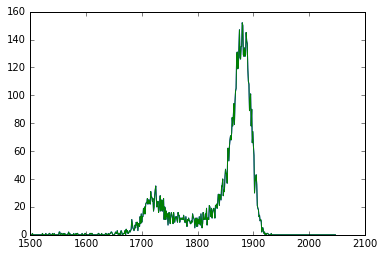

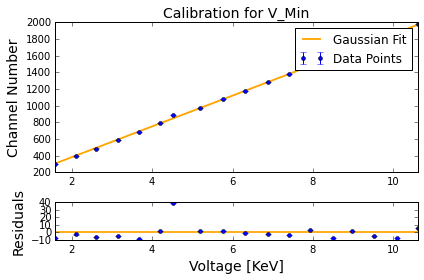

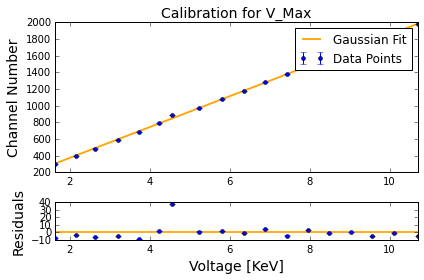

In [24]:
#Vmin
ydata = pulser_channels[0]
yerr = pulser_channels[1]
xmin = np.asarray(pulser_vmin)
vmin_fit, vmin_err = curve_fit(calibration.Linear, xmin, ydata, p0=[1, 1])
vmin_err = np.sqrt(np.diag(vmin_err))
ymin = calibration.Linear(xmin, *vmin_fit)
chi2_min = calibration.ChiSq_Linear(xmin, ydata, yerr, vmin_fit)

#Vmax
xmax = np.asarray(pulser_vmax)
vmax_fit, vmax_err = curve_fit(calibration.Linear, xmax, ydata, p0=vmin_fit)
vmax_err = np.sqrt(np.diag(vmax_err))
ymax = calibration.Linear(xmax, *vmax_fit)
chi2_max = calibration.ChiSq_Linear(xmax, ydata, yerr, vmax_fit)

#Plotting
calibration.Plot(xmin, ydata, ymin, yerr, 'Calibration for V_Min', 
                 plotFig = True, saveFig = False, xlab = 'Voltage [KeV]', ylab = 'Channel Number')

calibration.Plot(xmax, ydata, ymax, yerr, 'Calibration for V_Max', 
                 plotFig = True, saveFig = False, xlab = 'Voltage [KeV]', ylab = 'Channel Number')

In [25]:
Am_peaks = calibration.Load('Am_Peaks')
plt.plot(range(2048), Am_peaks[0])
plt.xlim(1500, 2100)

(1500.0, 2100.0)

## Calibration 2 (Decreased Amp Gain)

In [16]:
#Loading Pulser calibration peaks into array along with measured voltages
pulser_peaks_2 = calibration.Load('Calibration_02')
pulser_vmin_2 = [1.46, 2.01, 3.12, 3.91, 4.85, 5.86, 6.86, 7.16, 7.77, 8.39, 8.99, 9.64]
pulser_vmax_2 = [1.47, 2.08, 3.18, 3.97, 4.90, 5.89, 6.89, 7.44, 8.08, 8.45, 9.05, 9.54]

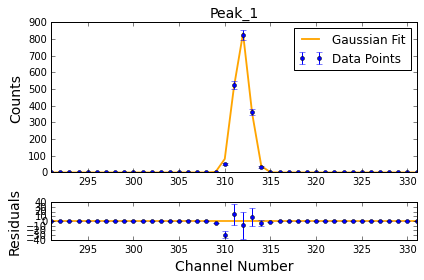

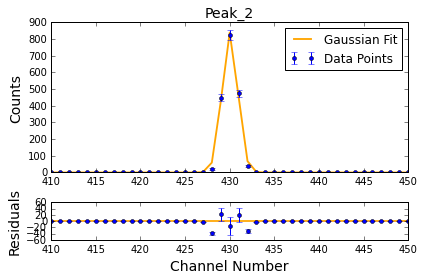

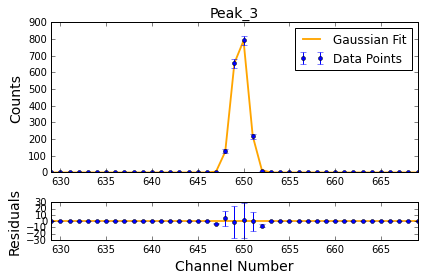

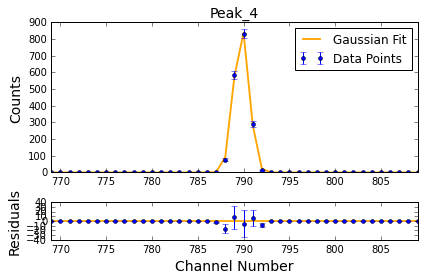

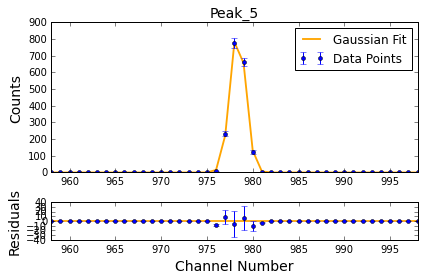

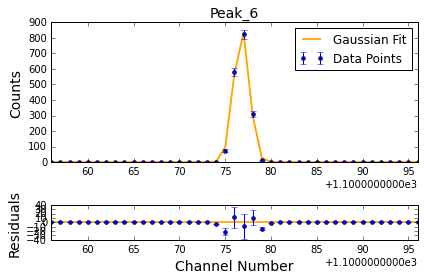

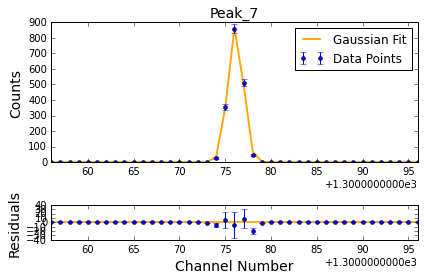

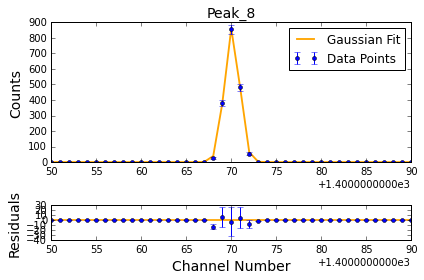

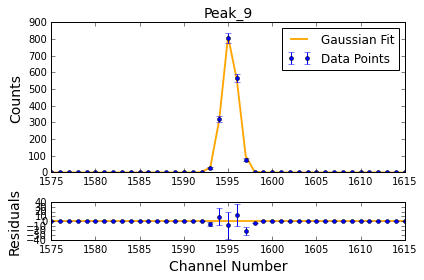

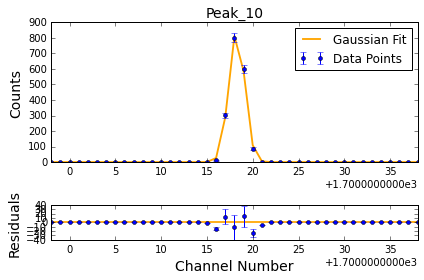

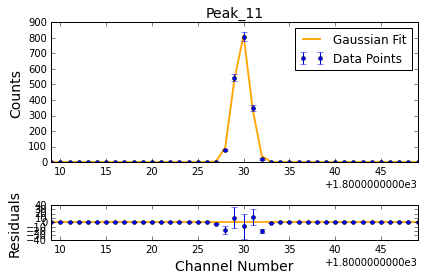

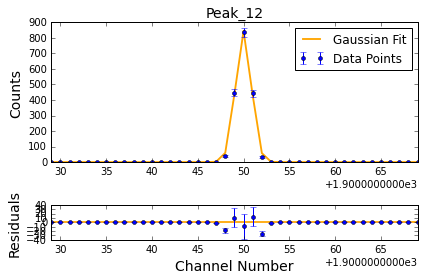

26.40580687091522 1.8307038053275146
41.879486267692094 1.9384141319831814
7.339502192635055 1.9384141319831814
51.81776943607652 1.9384141319831814
22.589554704028185 1.879886400513383
15.84608263171674 1.9384141319831814
20.84822984955599 1.9384141319831814
36.91568669482711 1.9384141319831814
25.419408535808348 1.879886400513383
11.528359833533463 2.009591492762881
30.988546827669005 1.9384141319831814
19.647940138317423 1.9384141319831814


In [18]:
pulser_fits_2 = calibration.Fit_Gauss(pulser_peaks_2, plotFig=True, width=20)

#List of Reduced Chi Squared Calculated, Reduced Chi Squared Theoretical for each fit
for i in range(len(pulser_fits_2)):
    print(pulser_fits[i][2], pulser_fits[i][3])